## Week5 조별과제 1조 (채윤병, 김태영, 주세연)

### [SVM 개념 보충설명](https://bskyvision.com/163)

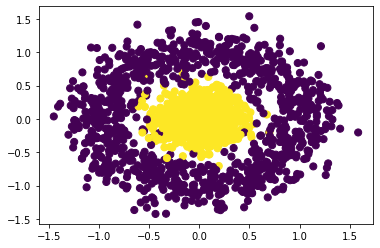

In [1]:
# 데이터 불러오기

from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X, y = make_circles(n_samples = 2000, noise = 0.2, factor = 0.05, random_state=2021)
plt.scatter(X[:,0], X[:,1], c = y, s = 50)
plt.show()

In [38]:
print(np.mean(X[y==0]),np.mean(X[y==1]))
print(np.std(X[y==0]),np.std(X[y==1]))
print(np.min(X[y==0]),np.min(X[y==1]))
print(np.max(X[y==0]),np.max(X[y==1]))

0.00970629438798775 -0.006030461460045169
0.734557552271713 0.20118863596985695
-1.4534366030991466 -0.7060765683287435
1.5848994026278505 0.6993695704035496


In [3]:
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [11]:
# 데이터셋 plot을 그리는 함수 생성

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

In [4]:
# clf를 사용하여 구분선을 그래프로 나타내는 함수 생성

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape) # 엥
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

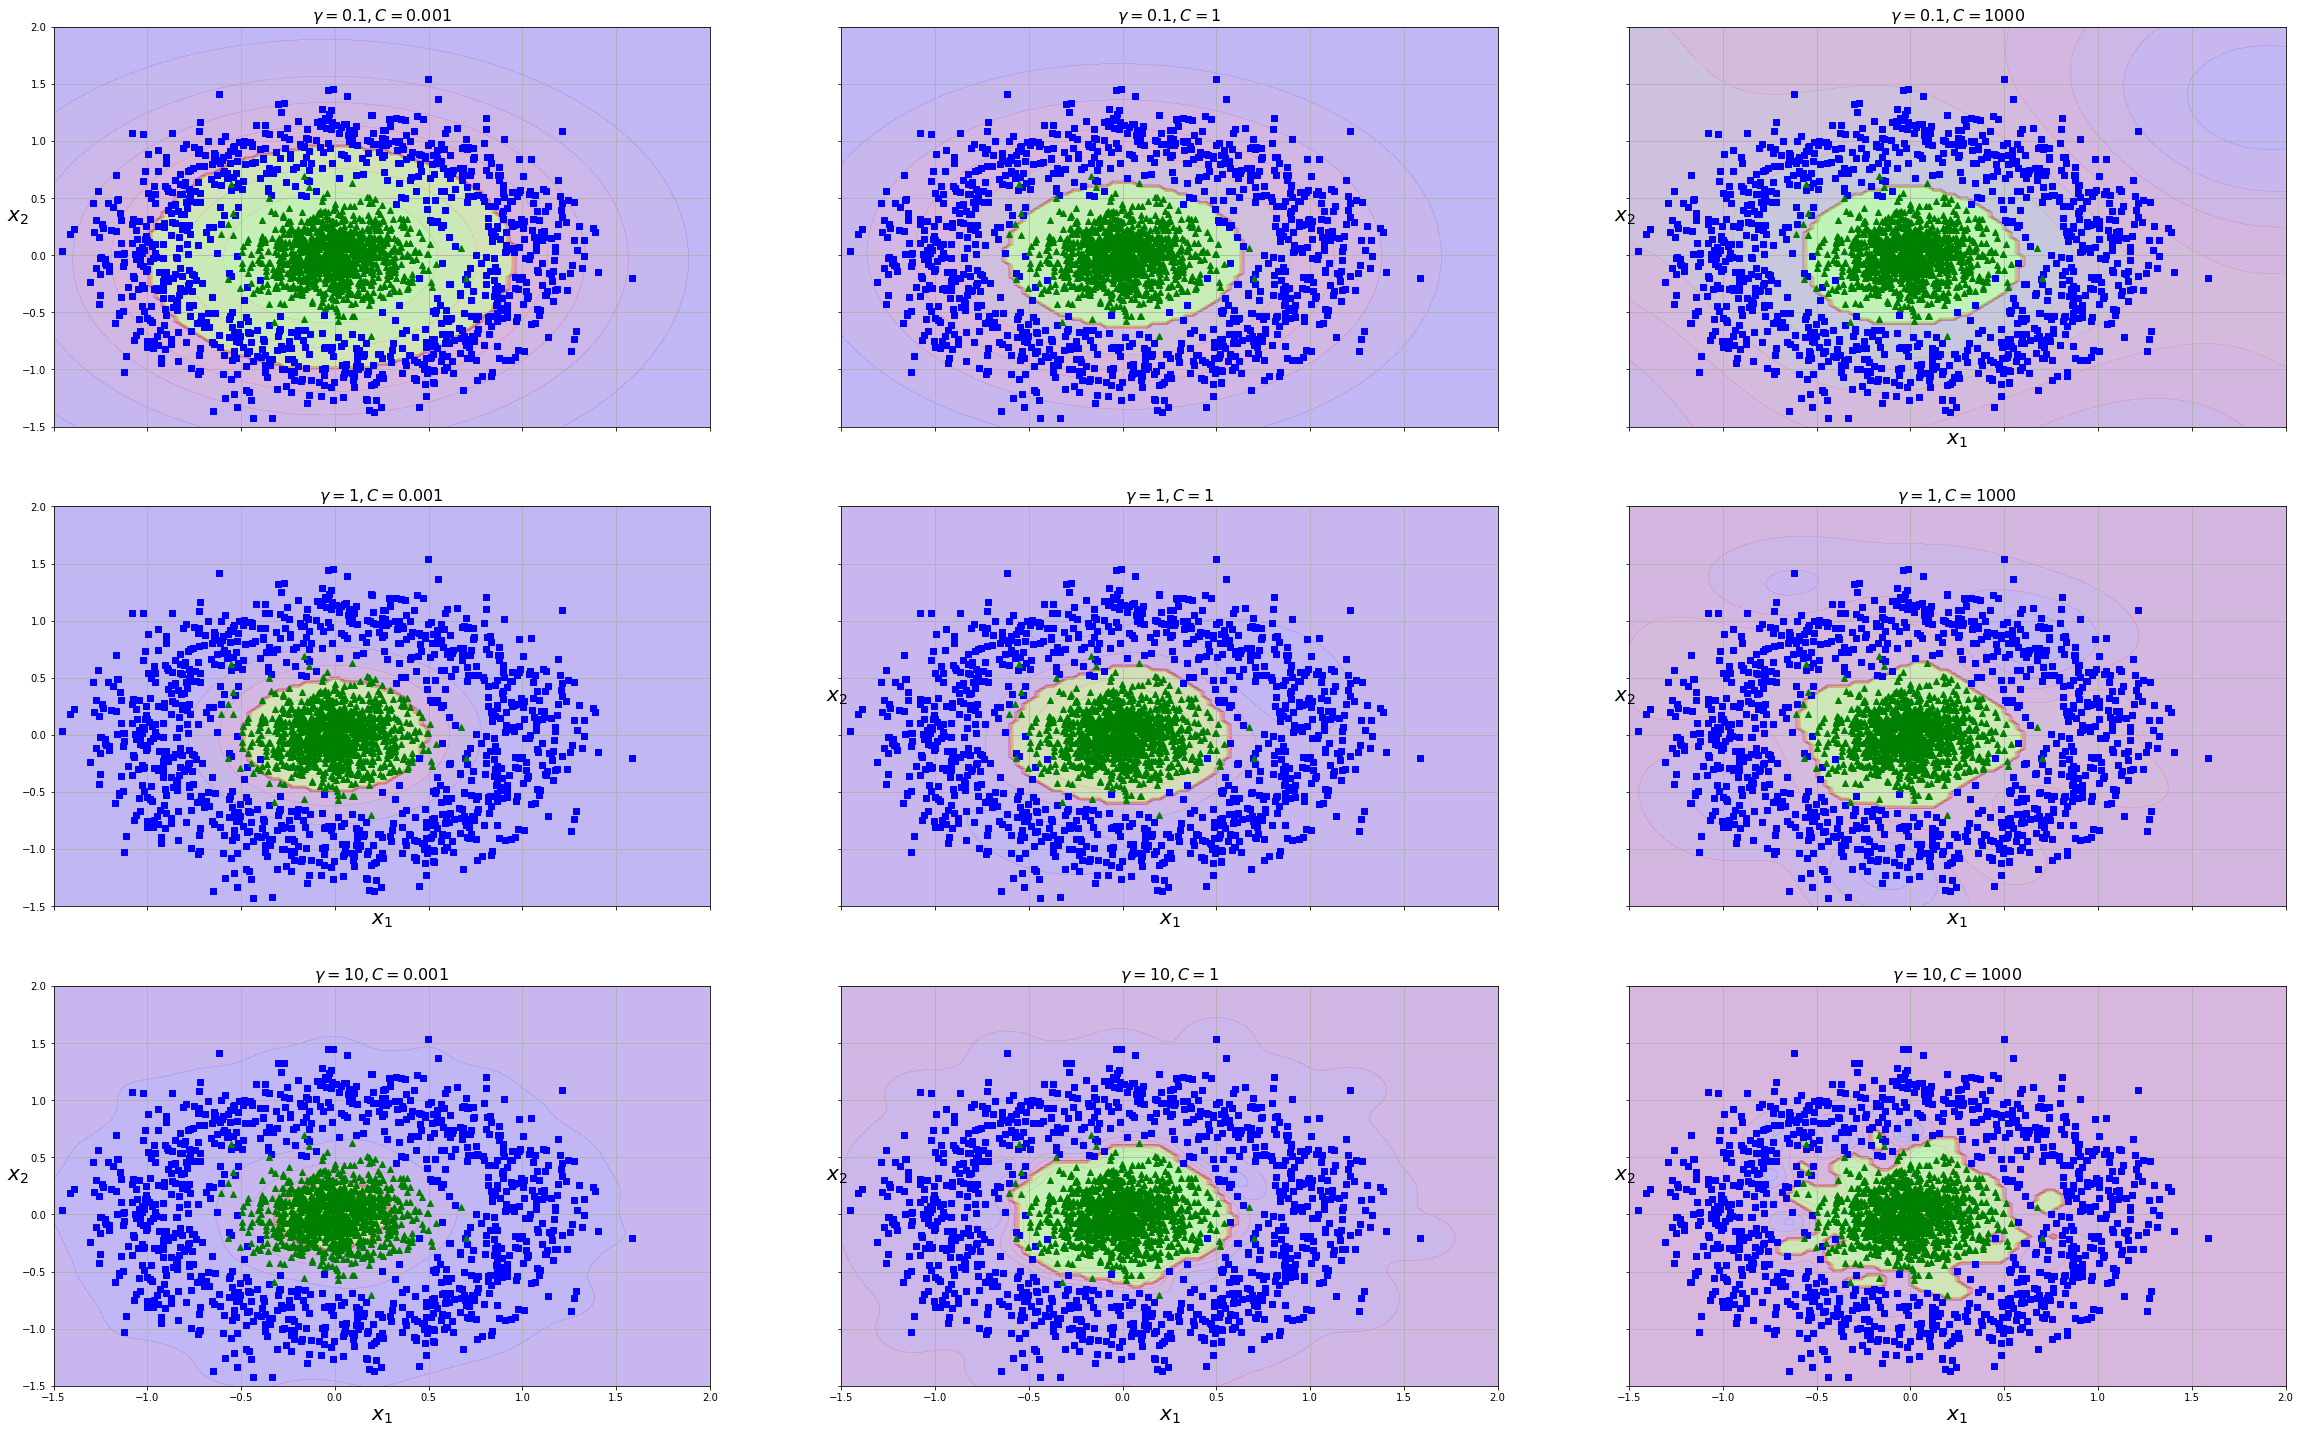

In [14]:
# gamma와 C 파라미터 지정
gamma1, gamma2, gamma3 = 0.1, 1, 10
C1, C2, C3 = 0.001, 1, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma1, C3), (gamma2, C1), (gamma2, C2), (gamma2, C3), (gamma3, C1), (gamma3, C2), (gamma3,C3)

# 9개의 조합으로 구성된 svm model fitting 저장
svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

# 9개의 gamma와 C의 조합으로 구성된 clf 분류 결과 시각화 (with dataset)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(40, 25), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 3, i % 3])
    plot_predictions(svm_clf, [-1.5, 2, -1.5, 2])
    plot_dataset(X, y, [-1.5, 2, -1.5, 2])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

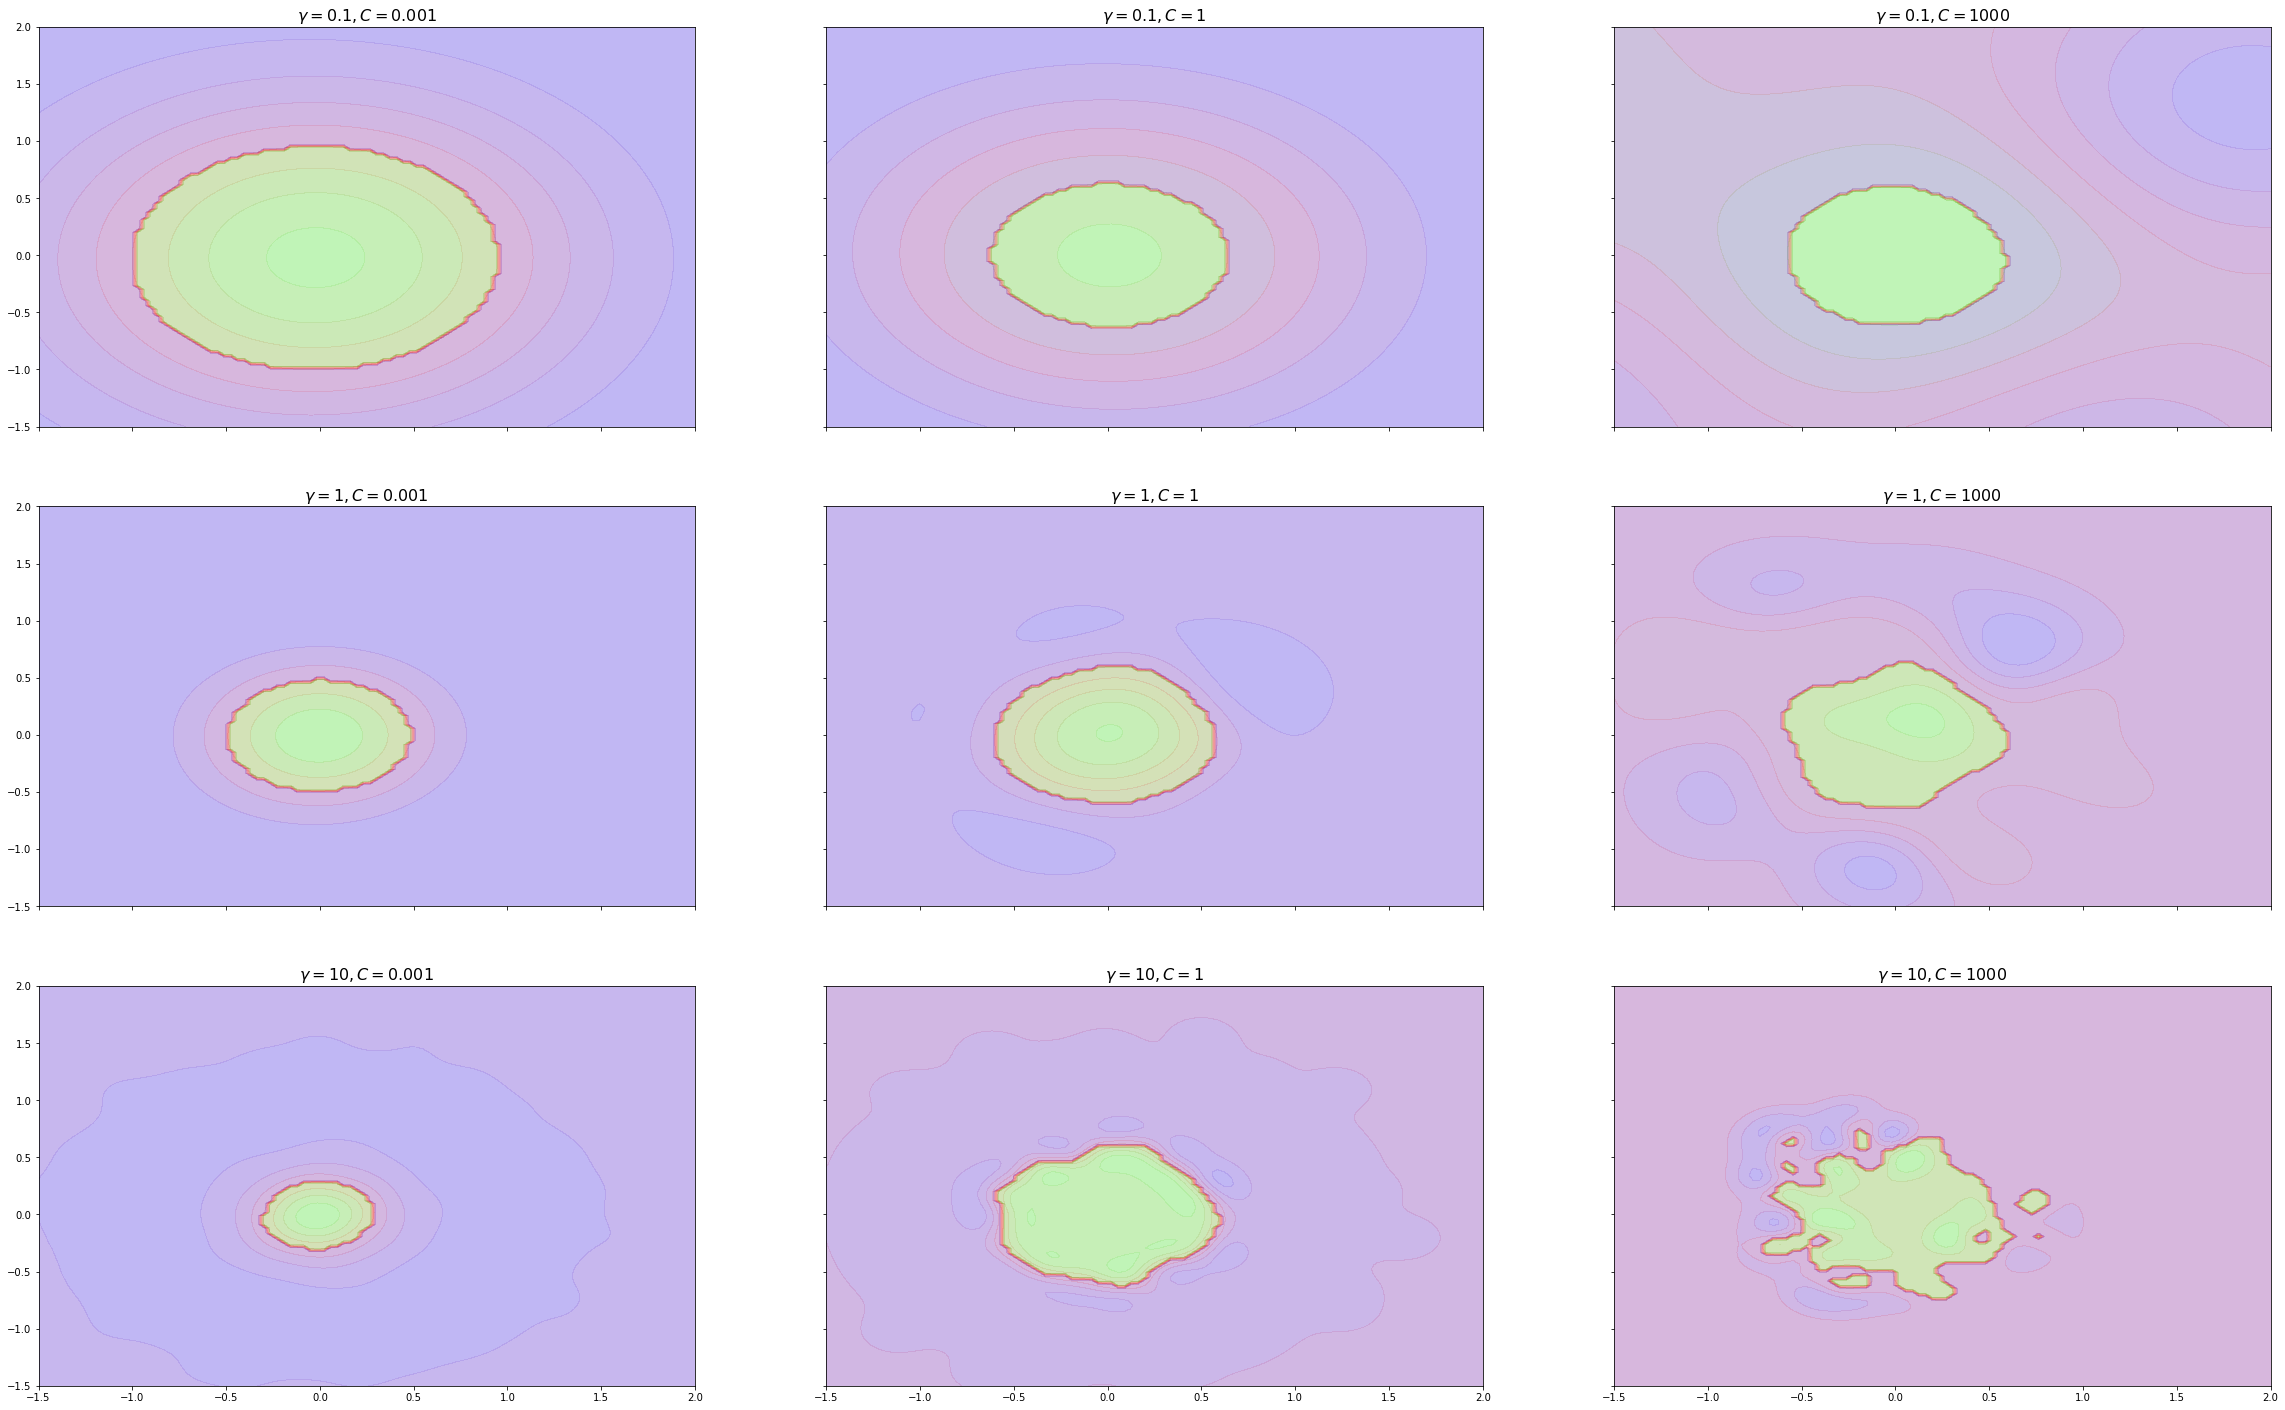

In [16]:
# 분류 boundary (without dataset)

gamma1, gamma2, gamma3 = 0.1, 1, 10
C1, C2, C3 = 0.001, 1, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma1, C3), (gamma2, C1), (gamma2, C2), (gamma2, C3), (gamma3, C1), (gamma3, C2), (gamma3,C3)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(40, 25), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 3, i % 3])
    plot_predictions(svm_clf, [-1.5, 2, -1.5, 2])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

In [27]:
svm_clfs

[Pipeline(steps=[('scaler', StandardScaler()),
                 ('svm_clf', SVC(C=0.001, gamma=0.1))]),
 Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC(C=1, gamma=0.1))]),
 Pipeline(steps=[('scaler', StandardScaler()),
                 ('svm_clf', SVC(C=1000, gamma=0.1))]),
 Pipeline(steps=[('scaler', StandardScaler()),
                 ('svm_clf', SVC(C=0.001, gamma=1))]),
 Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC(C=1, gamma=1))]),
 Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC(C=1, gamma=1))]),
 Pipeline(steps=[('scaler', StandardScaler()),
                 ('svm_clf', SVC(C=0.001, gamma=10))]),
 Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC(C=1, gamma=10))]),
 Pipeline(steps=[('scaler', StandardScaler()),
                 ('svm_clf', SVC(C=1000, gamma=10))])]

gamma를 증가시키면 가우시안 RBF의 범위가 좁아져서 각 샘플의 영향 범위가 작아짐 >> 결정 경계가 불규칙하고 울퉁불퉁해짐. 이를 이용해 underfitting을 감소시킬 수 있음 (다만, overfitting을 주의해야 하기도 함. gamma와 C의 적절한 값을 찾는 것이 과제)

C가 클수록 일반화 정도가 약해짐 -> 정규화의 강도 감소  
**gamma와 C는 비슷한 역할을 함.**

In [35]:
# 5번의 cross validation score 평균을 구해 정확도 저장
scores = []
for clf in svm_clfs:
    scores.append(np.mean(cross_val_score(clf, X,y,cv =5)))

Text(0.5, 1.0, 'Variation in accuracy by Parameter(Gamma, C)')

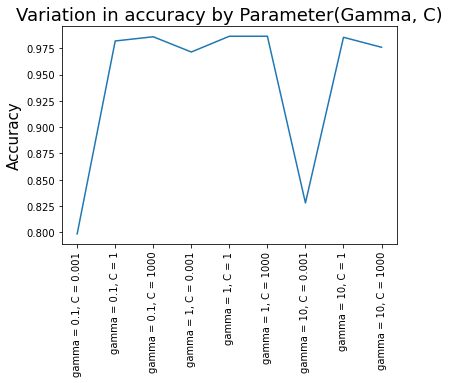

In [39]:
# gamma, C 조합 별 accuracy 시각화 
plt.figure()
plt.plot(scores)
plt.xticks(np.arange(9),['gamma = 0.1, C = 0.001', 'gamma = 0.1, C = 1','gamma = 0.1, C = 1000',
                        'gamma = 1, C = 0.001','gamma = 1, C = 1','gamma = 1, C = 1000',
                        'gamma = 10, C = 0.001','gamma = 10, C = 1','gamma = 10, C = 1000'],rotation = 90)
plt.ylabel('Accuracy',fontsize = 15)
plt.title('Variation in accuracy by Parameter(Gamma, C)', fontsize = 18)

#### gamma = 0.1, C = 0.001 일 때와 gamma = 10, C = 0.001 일 때의 정확도가 낮은 이유  
첫 번째 경우 gamma가 작아서 샘플이 주는 영향 정도가 넓고 C가 작기 때문에 규제가 커서 일반화의 경향이 큼 > 넓은 범위로 예측  
두 번째 경우 gamma가 커서 샘플이 주는 영향 정도가 좁고 C가 작기 때문에 규제가 커서 일반화의 경향이 큼 > 좁은 범위로 예측